In [ ]:
!pip install tensorflow --quiet
!pip install opencv-python
!pip install matplotlib

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [10]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4)
model.save('handwritten.keras')
model = tf.keras.models.load_model('handwritten.keras')
loss, accuracy = model.evaluate(x_test, y_test)

Epoch 1/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 961us/step - accuracy: 0.8679 - loss: 0.4579
Epoch 2/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 918us/step - accuracy: 0.9650 - loss: 0.1117
Epoch 3/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 962us/step - accuracy: 0.9777 - loss: 0.0733
Epoch 4/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 966us/step - accuracy: 0.9836 - loss: 0.0508
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - accuracy: 0.9720 - loss: 0.0858


0.09541068971157074
0.9710999727249146
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
This digit is probably a 1
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


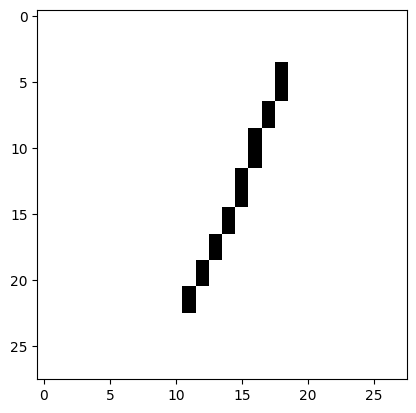

In [8]:
print(loss)
print(accuracy)
img = cv2.imread(f"./spec1.png")[:,:,0]
img = np.invert(np.array([img]))
prediction = model.predict(img)
print(f"This digit is probably a {np.argmax(prediction)}")
print(prediction)
plt.imshow(img[0], cmap=plt.cm.binary)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
This digit is probably a 7
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


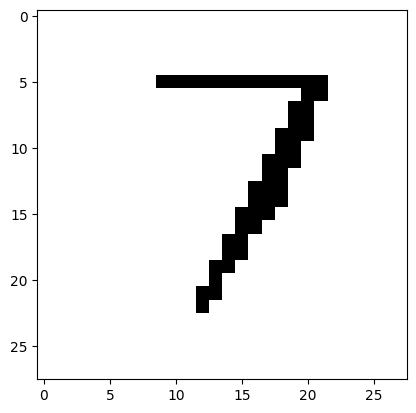

In [4]:
img = cv2.imread(f"./spec7.png")[:,:,0]
img = np.invert(np.array([img]))
prediction = model.predict(img)
print(f"This digit is probably a {np.argmax(prediction)}")
print(prediction)
plt.imshow(img[0], cmap=plt.cm.binary)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
This digit is probably a 4
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


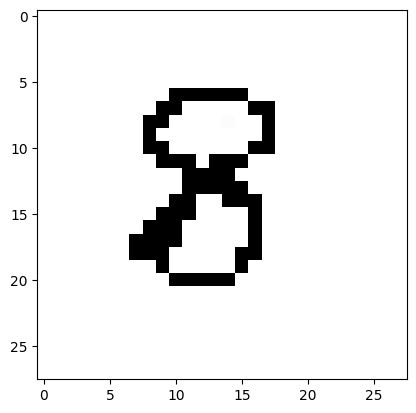

In [5]:
img = cv2.imread(f"./spec8.png")[:,:,0]
img = np.invert(np.array([img]))
prediction = model.predict(img)
print(f"This digit is probably a {np.argmax(prediction)}")
print(prediction)
plt.imshow(img[0], cmap=plt.cm.binary)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
This digit is probably a 0
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


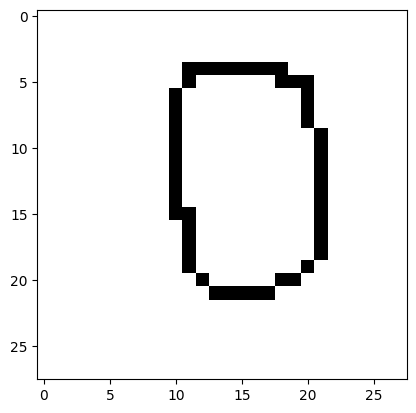

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
This digit is probably a 1
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


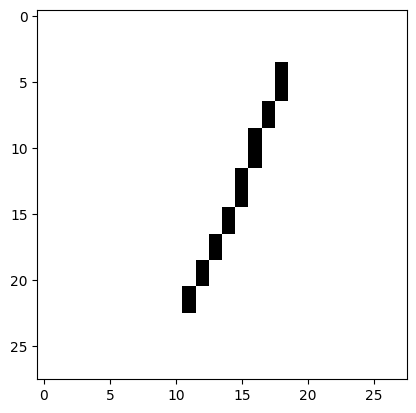

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
This digit is probably a 2
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


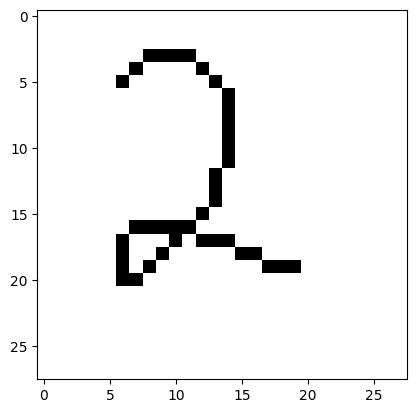

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
This digit is probably a 3
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


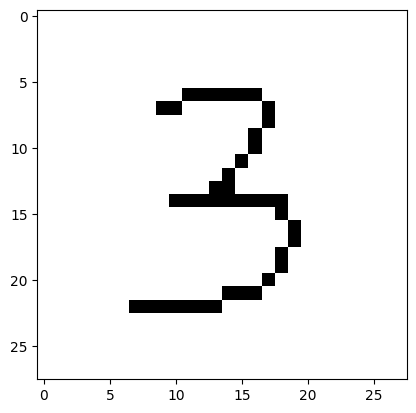

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
This digit is probably a 4
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


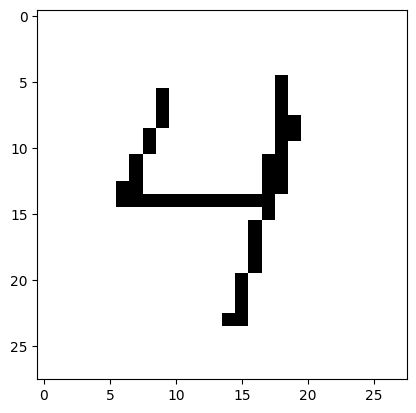

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
This digit is probably a 5
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


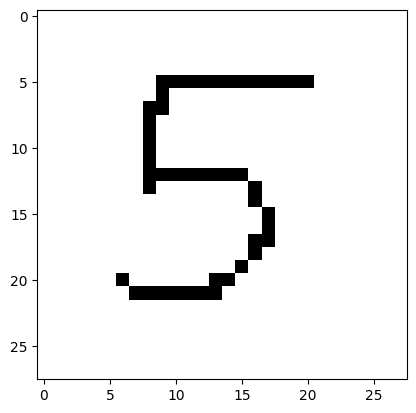

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
This digit is probably a 6
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


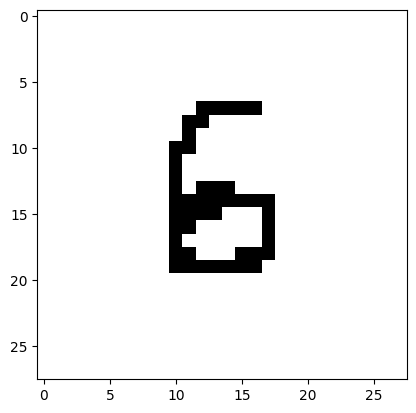

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
This digit is probably a 7
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


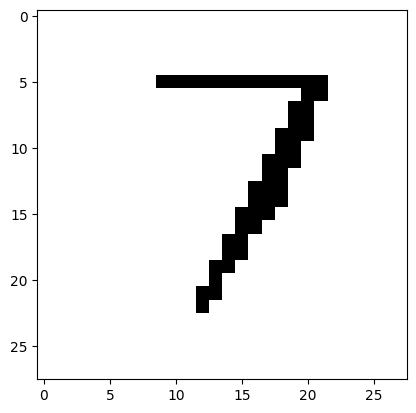

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
This digit is probably a 4
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


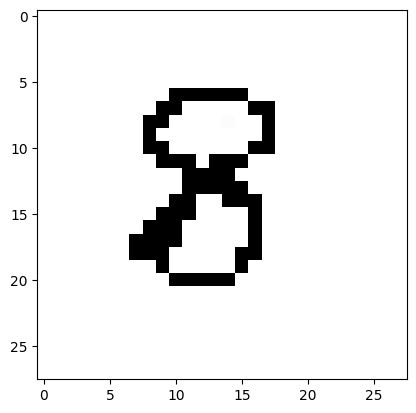

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
This digit is probably a 3
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


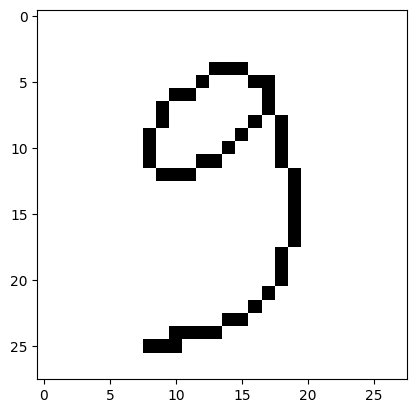

In [11]:
img_number = 0
while os.path.isfile(f"./spec{img_number}.png"):
  try:
    img = cv2.imread(f"./spec{img_number}.png")[:,:,0]
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    print(f"This digit is probably a {np.argmax(prediction)}")
    print(prediction)
    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.show()
  except:
    print("Error!")
  finally:
    img_number += 1